# Machine precision

(R. Landau book 1.7)

In [1]:
x=1
y=2
x/y

0.5

In [2]:
# approximate machine precision by checking if adding a small number to 1 makes a difference or not

value = 1.0
for i in range(60):
    value = value/2.0  
    value1 = 1.0  +  value
    value1_1 = value1 - 1.0 - value  # this should be 0 
    print(i,value,value1,value1_1)


0 0.5 1.5 0.0
1 0.25 1.25 0.0
2 0.125 1.125 0.0
3 0.0625 1.0625 0.0
4 0.03125 1.03125 0.0
5 0.015625 1.015625 0.0
6 0.0078125 1.0078125 0.0
7 0.00390625 1.00390625 0.0
8 0.001953125 1.001953125 0.0
9 0.0009765625 1.0009765625 0.0
10 0.00048828125 1.00048828125 0.0
11 0.000244140625 1.000244140625 0.0
12 0.0001220703125 1.0001220703125 0.0
13 6.103515625e-05 1.00006103515625 0.0
14 3.0517578125e-05 1.000030517578125 0.0
15 1.52587890625e-05 1.0000152587890625 0.0
16 7.62939453125e-06 1.0000076293945312 0.0
17 3.814697265625e-06 1.0000038146972656 0.0
18 1.9073486328125e-06 1.0000019073486328 0.0
19 9.5367431640625e-07 1.0000009536743164 0.0
20 4.76837158203125e-07 1.0000004768371582 0.0
21 2.384185791015625e-07 1.000000238418579 0.0
22 1.1920928955078125e-07 1.0000001192092896 0.0
23 5.960464477539063e-08 1.0000000596046448 0.0
24 2.9802322387695312e-08 1.0000000298023224 0.0
25 1.4901161193847656e-08 1.0000000149011612 0.0
26 7.450580596923828e-09 1.0000000074505806 0.0
27 3.7252902984

### 32-bit numbers
By default on modern architectures Python float numbers are 64-bit. Let's try with forced 32-bit floats 

In [3]:
# approximate machine precision by checking if adding a small number to 1 makes a difference or not

import numpy as np

value = np.float32(1.0)
one = np.float32(1.0)
two = np.float32(2.0)
for i in range(60):
    value = value/two  
    value1 = one  +  value
    value1_1 = value1 - one - value # this should be 0 
    print(i,value,value1,value1_1)


0 0.5 1.5 0.0
1 0.25 1.25 0.0
2 0.125 1.125 0.0
3 0.0625 1.0625 0.0
4 0.03125 1.03125 0.0
5 0.015625 1.015625 0.0
6 0.0078125 1.0078125 0.0
7 0.00390625 1.0039062 0.0
8 0.001953125 1.0019531 0.0
9 0.0009765625 1.0009766 0.0
10 0.00048828125 1.0004883 0.0
11 0.00024414062 1.0002441 0.0
12 0.00012207031 1.0001221 0.0
13 6.1035156e-05 1.000061 0.0
14 3.0517578e-05 1.0000305 0.0
15 1.5258789e-05 1.0000153 0.0
16 7.6293945e-06 1.0000076 0.0
17 3.8146973e-06 1.0000038 0.0
18 1.9073486e-06 1.0000019 0.0
19 9.536743e-07 1.000001 0.0
20 4.7683716e-07 1.0000005 0.0
21 2.3841858e-07 1.0000002 0.0
22 1.1920929e-07 1.0000001 0.0
23 5.9604645e-08 1.0 -5.9604645e-08
24 2.9802322e-08 1.0 -2.9802322e-08
25 1.4901161e-08 1.0 -1.4901161e-08
26 7.450581e-09 1.0 -7.450581e-09
27 3.7252903e-09 1.0 -3.7252903e-09
28 1.8626451e-09 1.0 -1.8626451e-09
29 9.313226e-10 1.0 -9.313226e-10
30 4.656613e-10 1.0 -4.656613e-10
31 2.3283064e-10 1.0 -2.3283064e-10
32 1.1641532e-10 1.0 -1.1641532e-10
33 5.820766e-11 1.0 -5

### Subtractive cancelation
(R. Landau book 2.1.2)

The solutions of a quadratic equation can be calculoated in several, mathematically equivalent ways:

$$x={\frac {-b\pm {\sqrt {b^{2}-4ac\ }}}{2a}}$$ or
$$x={\frac {-2c}{b\pm {\sqrt {b^{2}-4ac}}}}.$$

Let's see them in numerical calculations.

In [4]:
a=1.0
b=1.0
for n in range(20):
    c = 10**(-(n+1))
    x1_a = (-b+np.sqrt(b**2-4.0*a*c)) / (2*a)
    x2_a = (-b-np.sqrt(b**2-4.0*a*c)) / (2*a)

    x1_b = -2.0*c / (b+np.sqrt(b**2-4.0*a*c))
    x2_b = -2.0*c / (b-np.sqrt(b**2-4.0*a*c))
    
    print(n+1,c,x1_a,x1_b,x1_a-x1_b, '        ',x2_a,x2_b,x2_a-x2_b)


1 0.1 -0.1127016653792583 -0.11270166537925831 1.3877787807814457e-17          -0.8872983346207417 -0.8872983346207418 1.1102230246251565e-16
2 0.01 -0.010102051443364402 -0.01010205144336438 -2.0816681711721685e-17          -0.9898979485566356 -0.9898979485566336 -1.9984014443252818e-15
3 0.001 -0.0010010020050140178 -0.001001002005014042 2.42861286636753e-17          -0.998998997994986 -0.9989989979950102 2.4202861936828413e-14
4 0.0001 -0.00010001000200049459 -0.00010001000200050015 5.55653613398821e-18          -0.9998999899979994 -0.9998999899980551 5.562217353372034e-14
5 1e-05 -1.0000100002016676e-05 -1.000010000200005e-05 -1.6625562688707407e-17          -0.9999899998999979 -0.9999899998983355 -1.6624479570737094e-12
6 1e-06 -1.000001000006634e-06 -1.000001000002e-06 -4.6339054961914636e-18          -0.999998999999 -0.999998999994366 -4.633959882482941e-12
7 1e-07 -1.0000000999488279e-07 -1.00000010000002e-07 5.119215670298775e-18          -0.99999989999999 -0.9999999000511821 

/home/csabai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


In [5]:
np.log(np.exp(709.8))

/home/csabai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

### Pretty tables and simple figures

In [66]:
import pandas as pd          # a copmplex package for data handling. We use its pretty table rendering capacity, here.
import matplotlib.pyplot as plt     # for plotting
# simple plot
#%matplotlib inline
# NEW interactive
%matplotlib notebook          
# the above row allows plot rendering in the notebook

# Same as above but instead of printing, collect data into a list
values = []
a=1.0
c=1.0
for n in range(10):
    b = 10**((n+2))
    print(b)
    x1_a = (-b+np.sqrt(b**2-4.0*a*c)) / (2*a)
    x2_a = (-b-np.sqrt(b**2-4.0*a*c)) / (2*a)

    x1_b = -2.0*c / (b+np.sqrt(b**2-4.0*a*c))
    x2_b = -2.0*c / (b-np.sqrt(b**2-4.0*a*c))
    
    values.append([n+1,c,x1_a,x1_b,x1_a-x1_b,x2_a,x2_b,x2_a-x2_b])
    
table = pd.DataFrame(values,columns=['N','c','x1_a','x1_b','x1_a-x1_b','x2_a','x2_b','x2_a-x2_b'])
table

100
1000
10000
100000
1000000
10000000
100000000
1000000000
10000000000
100000000000


/home/csabai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


,N,c,x1_a,x1_b,x1_a-x1_b,x2_a,x2_b,x2_a-x2_b
0,1,1.0,-1.000100e-02,-1.000100e-02,1.221245e-15,-9.999000e+01,-9.999000e+01,1.220712e-11
1,2,1.0,-1.000001e-03,-1.000001e-03,-2.062109e-14,-9.999990e+02,-9.999990e+02,-2.062120e-08
2,3,1.0,-1.000000e-04,-1.000000e-04,-1.117663e-13,-1.000000e+04,-1.000000e+04,-1.117663e-05
3,4,1.0,-1.000000e-05,-1.000000e-05,-3.384358e-12,-1.000000e+05,-9.999997e+04,-3.384356e-02
4,5,1.0,-1.000008e-06,-1.000000e-06,-7.614492e-12,-1.000000e+06,-9.999924e+05,-7.614434e+00
5,6,1.0,-9.965152e-08,-1.000000e-07,3.484845e-10,-1.000000e+07,-1.003497e+07,3.497032e+04
6,7,1.0,-7.450581e-09,-1.000000e-08,2.549419e-09,-1.000000e+08,-1.342177e+08,3.421773e+07
7,8,1.0,0.000000e+00,-1.000000e-09,1.000000e-09,-1.000000e+09,-inf,inf
8,9,1.0,0.000000e+00,-1.000000e-10,1.000000e-10,-1.000000e+10,-inf,inf
9,10,1.0,0.000000e+00,-1.000000e-11,1.000000e-11,-1.000000e+11,-inf,inf


<IPython.core.display.Javascript object>


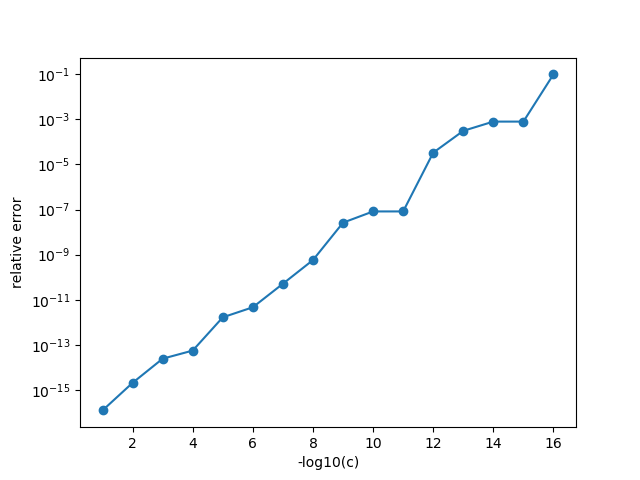

Text(0,0.5,'relative error')

In [7]:
plt.semilogy(table['N'],np.abs(table['x1_a-x1_b']/(table['x1_a'])),'o-')
plt.xlabel('-log10(c)')
plt.ylabel('relative error')

In [10]:
import math
import cmath
import numpy
 
def quad_discriminating_roots(a,b,c, entier = 1e-5):
    """For reference, the naive algorithm which shows complete loss of
    precision on the quadratic in question.  (This function also returns a
    characterization of the roots.)"""
    discriminant = b*b - 4*a*c
    a,b,c,d =complex(a), complex(b), complex(c), complex(discriminant)
    root1 = (-b + cmath.sqrt(d))/2./a
    root2 = (-b - cmath.sqrt(d))/2./a
    if abs(discriminant) < entier:
        return "real and equal", abs(root1), abs(root1)
    if discriminant > 0:
        return "real", root1.real, root2.real
    return "complex", root1, root2
 
def middlebrook(a, b, c):
    try:
        q = math.sqrt(a*c)/b
        f = .5+ math.sqrt(1-4*q*q)/2
    except ValueError:
        q = cmath.sqrt(a*c)/b
        f = .5+ cmath.sqrt(1-4*q*q)/2
    return (-b/a)*f, -c/(b*f)
 
def whatevery(a, b, c):
    try:
        d = math.sqrt(b*b-4*a*c)
    except ValueError:
        d = cmath.sqrt(b*b-4*a*c)
    if b > 0:
        return div(2*c, (-b-d)), div((-b-d), 2*a)
    else:
        return div((-b+d), 2*a), div(2*c, (-b+d))
 
def div(n, d):
    """Divide, with a useful interpretation of division by zero."""
    try:
        return n/d
    except ZeroDivisionError:
        if n:
            return n*float('inf')
        return float('nan')
 
testcases = [
    (3, 4, 4/3),    # real, equal
    (3, 2, -1),     # real, unequal
    (3, 2, 1),      # complex
    (1, -1e9, 1),   # ill-conditioned "quadratic in question" required by task.
    (1, -1e100, 1),
    (1, -1e200, 1),
    (1, -1e300, 1),
]
 
print('Naive:')
for c in testcases:
    print("{} {:.5} {:.5}".format(*quad_discriminating_roots(*c)))
 
print('\nMiddlebrook:')
for c in testcases:
    print(("{:.5} "*2).format(*middlebrook(*c)))
 
print('\nWhat Every...')
for c in testcases:
    print(("{:.5} "*2).format(*whatevery(*c)))
 
print('\nNumpy:')
for c in testcases:
    print(("{:.5} "*2).format(*numpy.roots(c)))

Naive:
real and equal 0.66667 0.66667
real 0.33333 -1.0
complex (-0.33333+0.4714j) (-0.33333-0.4714j)
real 1e+09 0.0
real 1e+100 0.0
real nan nan
real nan nan

Middlebrook:
-0.66667 -0.66667 
(-1+0j) (0.33333+0j) 
(-0.33333-0.4714j) (-0.33333+0.4714j) 
1e+09 1e-09 
1e+100 1e-100 
1e+200 1e-200 
1e+300 1e-300 

What Every...
-0.66667 -0.66667 
0.33333 -1.0 
(-0.33333+0.4714j) (-0.33333-0.4714j) 
1e+09 1e-09 
1e+100 1e-100 
inf 0.0 
inf 0.0 

Numpy:
-0.66667 -0.66667 
-1.0 0.33333 
(-0.33333+0.4714j) (-0.33333-0.4714j) 
1e+09 1e-09 
1e+100 1e-100 
1e+200 1e-200 
1e+300 0.0 


In [54]:
b=np.float32(3.335625986485901 + 2e-8)
a=np.float32(1.22)
c=np.float32(2.28)

x1_a = (-b+np.sqrt(b**2-4.0*a*c)) / (2*a)
x2_a = (-b-np.sqrt(b**2-4.0*a*c)) / (2*a)

x1_b = -2.0*c / (b+np.sqrt(b**2-4.0*a*c))
x2_b = -2.0*c / (b-np.sqrt(b**2-4.0*a*c))

print(b**2,4.0*a*c, b**2-4.0*a*c, x1_a,x1_b,x2_a,x2_b)

11.12640164802201 11.12640012130737 1.5267146409314591e-06 -1.3665534607354781 -1.3665534607354781 -1.3675662500119816 -1.3675662500119816


In [55]:
np.roots([a,b,c])

array([-1.3674995, -1.3666202], dtype=float32)

In [56]:
np.sqrt(11.12640012130737)

3.335625896485901

In [57]:
whatevery(a, b, c)

(-1.3665131065374934, -1.3676066353101148)

In [58]:
quad_discriminating_roots(a,b,c)

('real and equal', 1.3665130754373451, 1.3665130754373451)

In [62]:
b=np.float32(1e8)
a=np.float32(1)
c=np.float32(1)

x1_a = (-b+np.sqrt(b**2-4.0*a*c)) / (2*a)
x2_a = (-b-np.sqrt(b**2-4.0*a*c)) / (2*a)

x1_b = -2.0*c / (b+np.sqrt(b**2-4.0*a*c))
x2_b = -2.0*c / (b-np.sqrt(b**2-4.0*a*c))

print(b**2,4.0*a*c, b**2-4.0*a*c, x1_a,x1_b,x2_a,x2_b)

1e+16 4.0 9999999999999996.0 -7.450580596923828e-09 -1e-08 -100000000.0 -134217728.0
